In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv(r"C:\Users\HP\sales_data_with_discounts.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [3]:
num_col = df.select_dtypes(include=np.number)
num_col

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
mean_values = (num_col).mean()
median_values = (num_col).median()
mode_values = (num_col).mode().iloc[0]
std_deviation = (num_col).std()
print(f"\nMean\n")
print(mean_values)
print(f"\nMedian\n")
print(median_values)
print(f"\nMode\n")
print(mode_values)
print(f"\nStandard Deviation\n")
print(std_deviation)

<Axes: xlabel='Volume', ylabel='Count'>

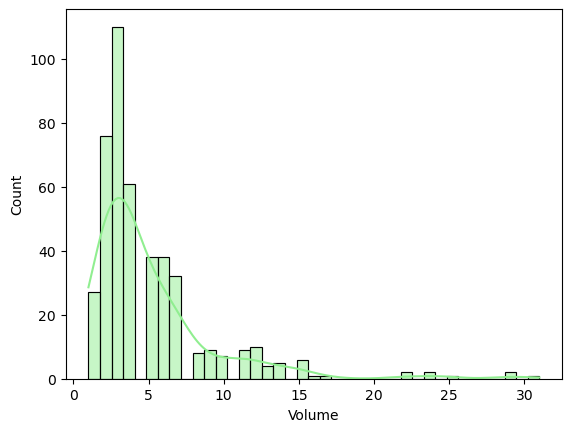

In [5]:
sns.histplot(num_col['Volume'], kde=True, color='lightgreen')

<Axes: xlabel='Avg Price', ylabel='Count'>

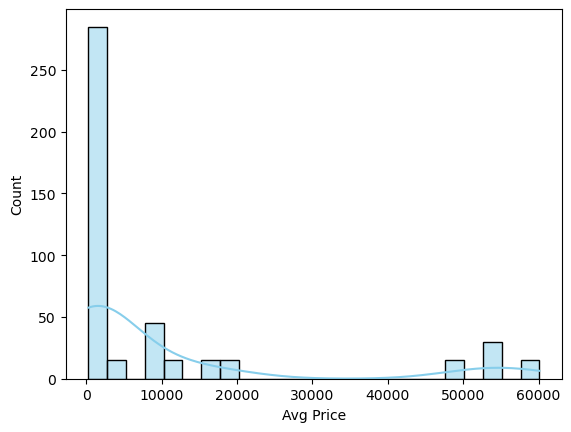

In [6]:
sns.histplot(num_col['Avg Price'],color='skyblue',kde=True)

<Axes: xlabel='Total Sales Value', ylabel='Count'>

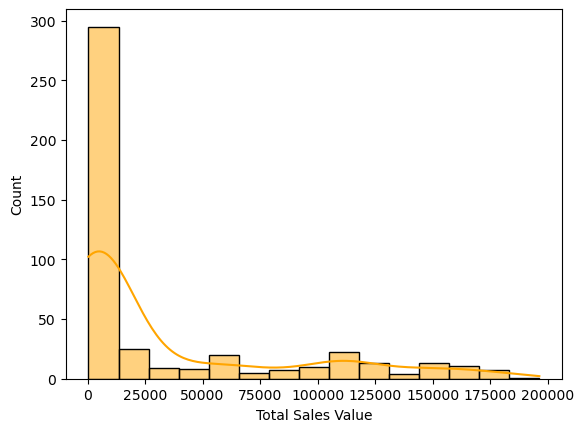

In [7]:
sns.histplot(num_col['Total Sales Value'], kde=True, color='orange')

<Axes: xlabel='Discount Rate (%)', ylabel='Count'>

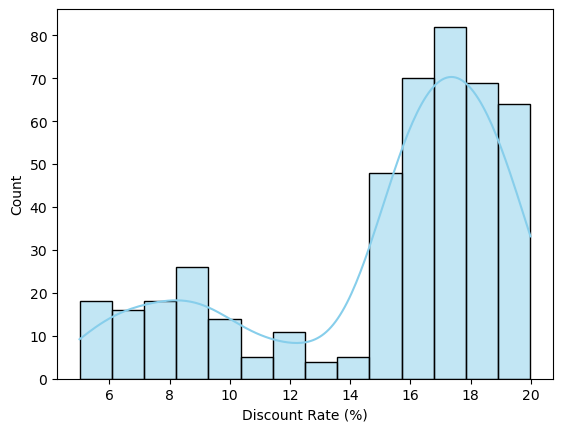

In [8]:
sns.histplot(num_col['Discount Rate (%)'], kde=True, color='skyblue')

<Axes: xlabel='Discount Amount', ylabel='Count'>

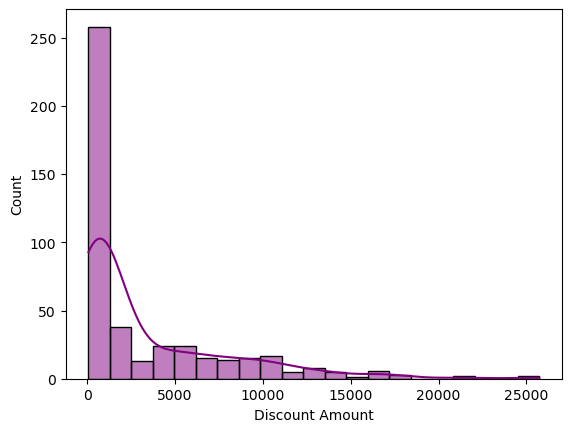

In [9]:
sns.histplot(num_col['Discount Amount'], kde=True, color='purple')

<Axes: xlabel='Net Sales Value', ylabel='Count'>

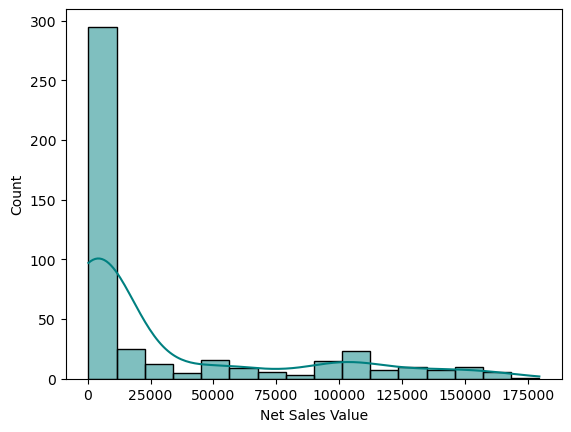

In [10]:
sns.histplot(num_col['Net Sales Value'], kde=True, color='teal')

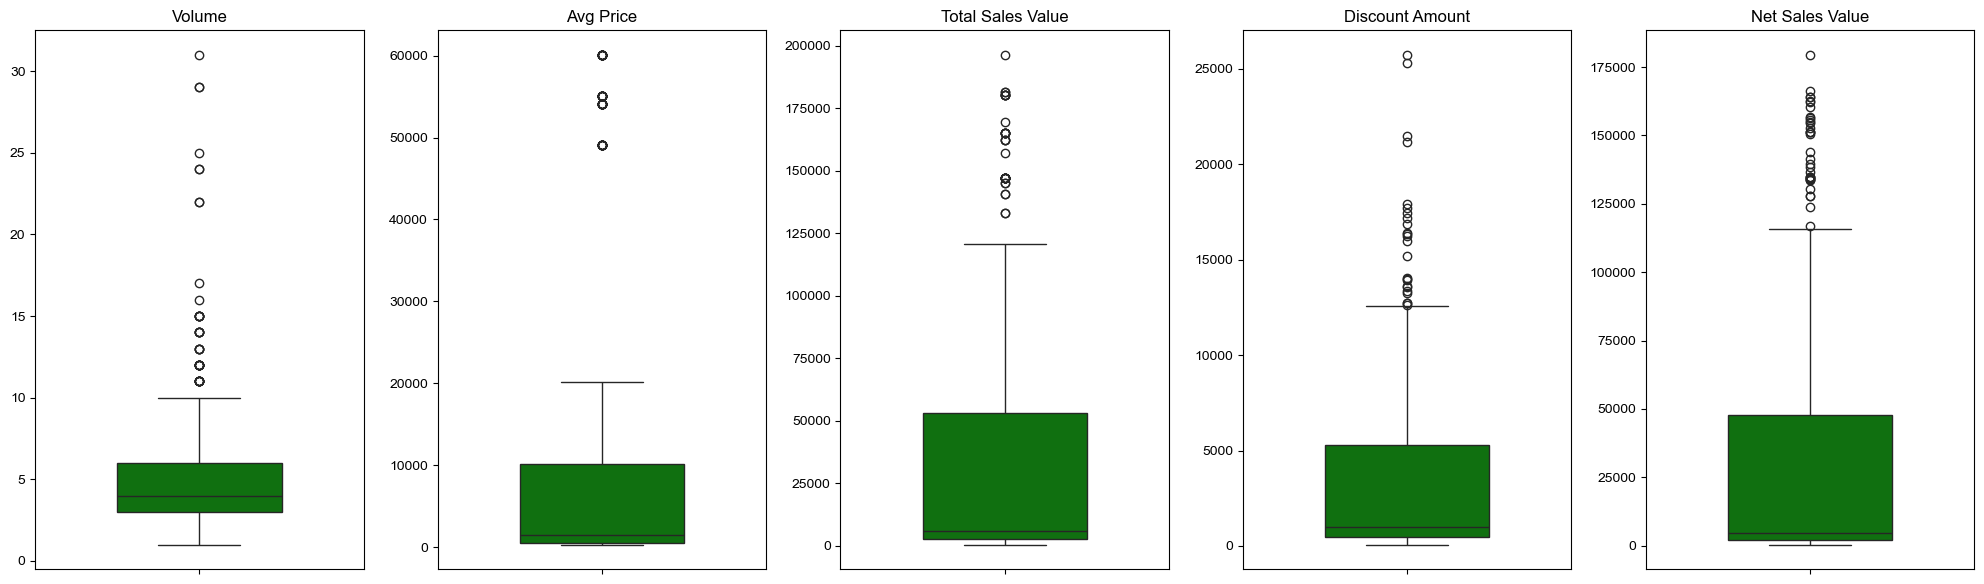

In [11]:
num_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Amount', 'Net Sales Value']


fig, axes = plt.subplots(1, len(num_cols), figsize=(20, 6))
sns.set_theme(style="whitegrid")


for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='green', width=0.5)
    axes[i].set_title(col)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [19]:
feature = df['Net Sales Value']


Q1 = feature.quantile(0.25)
Q3 = feature.quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = feature[(feature < lower_bound) | (feature > upper_bound)]
print(f"Outlier Range: Below {lower_bound:.2f} or Above {upper_bound:.2f}")
print("Specific Outlier Values:\n", outliers)

Outlier Range: Below -66266.35 or Above 116316.47
Specific Outlier Values:
 0      160346.501180
6      133705.960281
9      162399.016267
36     139563.638215
38     151348.339806
39     163915.971000
66     179507.479049
96     134677.496342
126    134731.954625
127    152667.358354
157    151182.489533
180    128021.668141
186    134546.434042
187    150648.927866
188    151300.061501
189    162603.186379
210    144071.775796
216    133691.761681
240    155761.977806
243    130557.833327
246    136485.419091
278    154937.485475
300    123703.324633
306    134934.946692
308    154541.087365
309    163967.080070
338    156895.968772
339    166263.161348
363    127965.990988
366    134024.219259
390    116881.405280
396    133917.772667
420    141315.267719
426    138449.922039
428    156330.969890
Name: Net Sales Value, dtype: float64


In [12]:
cat_col = df.select_dtypes(include=['object', 'category'])#.columns.tolist()

print(f"Categorical Columns: {cat_col}")

Categorical Columns:            Date       Day  SKU City         BU  Brand       Model
0    01-04-2021  Thursday  M01    C    Mobiles  RealU       RU-10
1    01-04-2021  Thursday  M02    C    Mobiles  RealU   RU-9 Plus
2    01-04-2021  Thursday  M03    C    Mobiles   YouM       YM-99
3    01-04-2021  Thursday  M04    C    Mobiles   YouM  YM-99 Plus
4    01-04-2021  Thursday  M05    C    Mobiles   YouM      YM-98 
..          ...       ...  ...  ...        ...    ...         ...
445  15-04-2021  Thursday  L06    C  Lifestyle  Jeera   M-Casuals
446  15-04-2021  Thursday  L07    C  Lifestyle   Viva   W-Western
447  15-04-2021  Thursday  L08    C  Lifestyle   Viva    W-Lounge
448  15-04-2021  Thursday  L09    C  Lifestyle  Jeera   M-Formals
449  15-04-2021  Thursday  L10    C  Lifestyle  Jeera     M-Shoes

[450 rows x 7 columns]


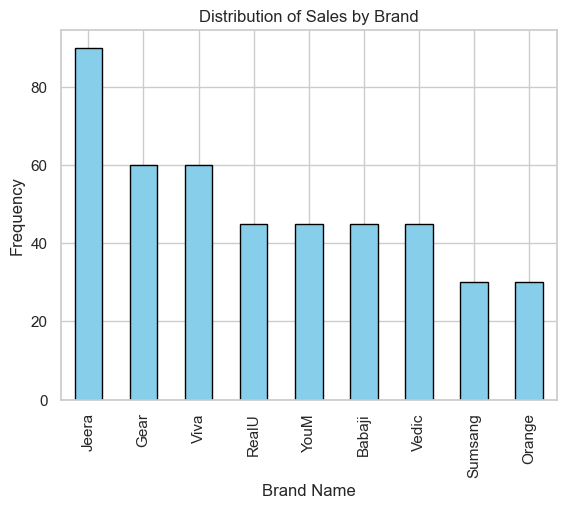

In [13]:
brand_counts = df['Brand'].value_counts()
brand_counts.plot(kind='bar', color='skyblue', edgecolor='black')


plt.title('Distribution of Sales by Brand')
plt.xlabel('Brand Name')
plt.ylabel('Frequency')


plt.show()

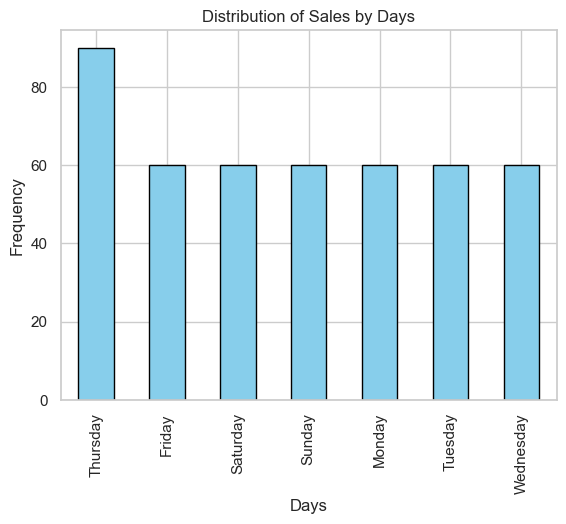

In [14]:
brand_counts = df['Day'].value_counts()
brand_counts.plot(kind='bar', color='skyblue', edgecolor='black')


plt.title('Distribution of Sales by Days')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.show()

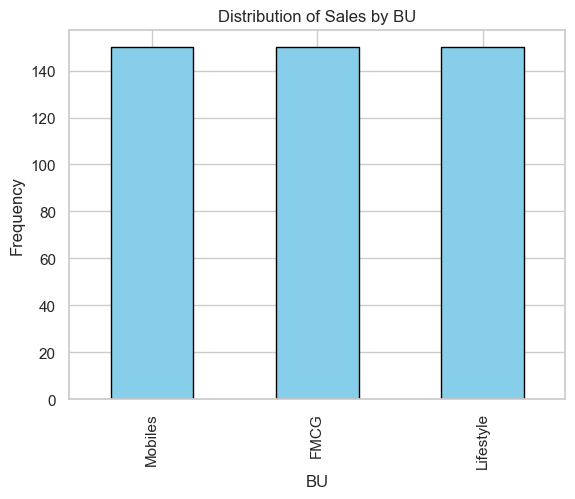

In [27]:
brand_counts = df['BU'].value_counts()
brand_counts.plot(kind='bar', color='skyblue', edgecolor='black')


plt.title('Distribution of Sales by BU')
plt.xlabel('BU')
plt.ylabel('Frequency')


plt.show()